
    1.Название работы:

    2.Цель:Познакомиться со средствами генерации и визуализации простых сигналов.
    
    3.Постановка задачи:промоделировать синусоидальный и прямоугольный сигналы с различными параметрами. Получить их спектры. Вывести на график.

    4.Теоритический раздел
   Ряд Фурье — представление функции f с периодом τ ∞
f(x)=a0 +􏰃Akcos􏰁2kπx−αk􏰂(1) 2τ
k=1
Дискретное преобразование Фурье является линейным преобразованием. Переводит век-
тор временных отсчетов в вектор спектральных отсчетов той же длинны. Преобразование Фурье сигнала является разложением по гармоническим функциям всех частот в диапо- зоне от −∞ до +∞. Позволяет при работе с сигналами осуществить частотно-временной переход.
Корреляция, и ее частный случай для центрированных сигналов – ковариация, являет- ся методом анализа сигналов. Корреляционный анализ дает возможность установить в сигналах (или в рядах цифровых данных сигналов) наличие определенной связи изме- нения значений сигналов по независи

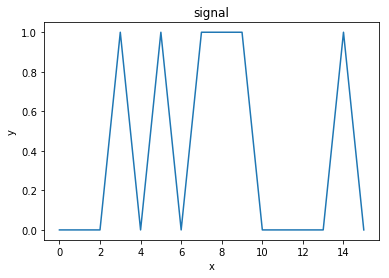

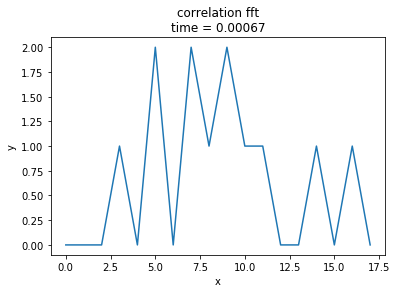

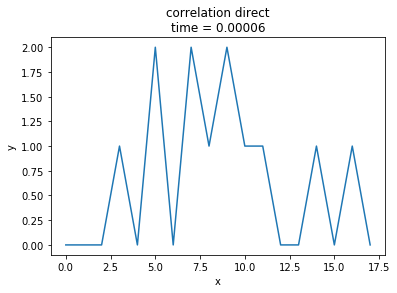

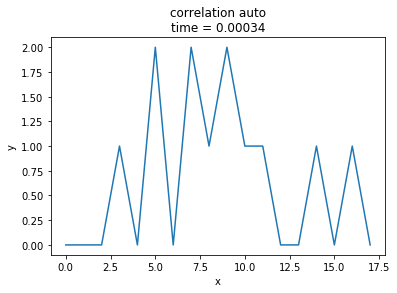

sync_mess       = sig[6 : 14] =   [1 0 1]
package start   =  6
package         =  [0 1 1 1 0 0 0 0]


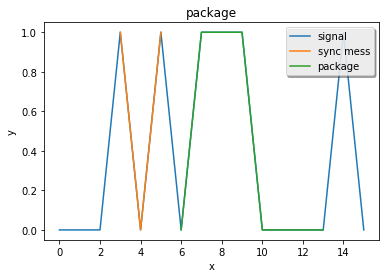

In [5]:
from __future__ import print_function
import sys
sys.path.append("../..") 
from Telecom.my_telecom import *
from timeit import default_timer as timer

print(lab2_theory.__doc__)

show = True

sig = np.array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])
sync_mess = np.array([1, 0, 1])
p_size = 8

plot_graphic(x=np.arange(0, sig.__len__(), 1), y=sig,
             title='signal', show=True)

# sig_noise = sig + np.random.randn(len(sig))

for method in ['fft', 'direct', 'auto']:
    t = timer()
    corr = signal.correlate(sig, sync_mess, mode='full', method=method)
    elapsed = timer() - t
    plot_graphic(x=np.arange(0, corr.__len__(), 1), y=corr,
                 title='correlation %s\ntime = %.5f' % (method, elapsed),
                 show=True)

sy_mess_end = 0
max_corr = 0
i = 0
for n in corr:
    if n > max_corr:
        max_corr = n
        sy_mess_end = i
    i += 1

p_start = sy_mess_end+1
p_end = p_start + p_size
p = sig[p_start:p_end]

print("sync_mess       = sig[%.d : %.d] =  " % (p_start,p_start+p_size),
      sig[p_start-sync_mess.__len__():p_start])
print("package start   = ", p_start)
print("package         = ", p)

plot_graphic(x=np.arange(0, sig.__len__(), 1), y=sig)
plot_graphic(x=np.arange(p_start-3, p_start, 1), y=sync_mess)
plot_graphic(x=np.arange(p_start, p_end, 1), y=p,
             title='package')
plt.legend(('signal', 'sync mess','package'), loc='upper right', shadow=True)

plt.show()